In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:66: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:71: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:76: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significa

True

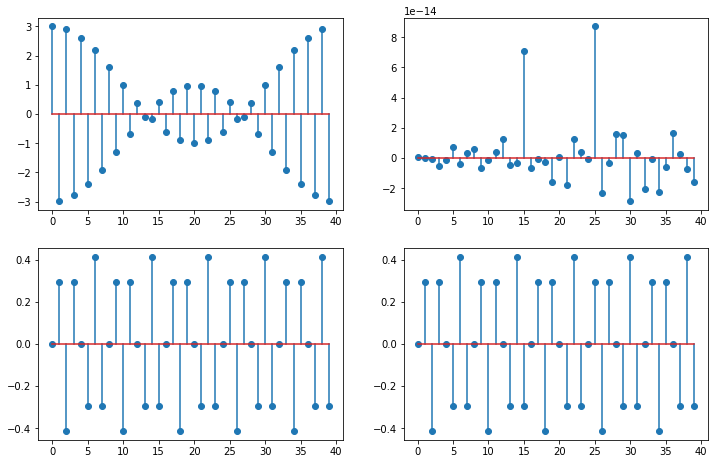

In [2]:
from scipy import signal
w1 = np.arange(-10,10,1/2)                            #Uniform arrangment of numbers from -10 to 10
w2 = np.arange(-5,5,1/4)                              #Uniform arrangment of numbers from -5 to 5

#Here we have defined a rect function


t = len(w1) 
def rect(t):
    s = (abs(t)<=0.5).astype(float)
    return s

#Here we have defined a sin function


def sin(t):
    s= np.sin(np.pi*t*5)
    return s

x1 = rect(w1)                                        #Calling the rect function
       
    

#Here we will Perform DFT for x1



c1 = np.zeros(t,complex)                             #Making an array of zeros permitting complex enteries here
n = np.arange(t)
for k in range(t):
    output1 = x1[n]*np.exp(-2j*np.pi*k*n/t)
    c1[k] = np.sum(output1)
    


#Here we will Perform DFT FOR x2           
        
        
x2 = sin(w2)                                         #Calling the sin function
c2 = np.zeros(t,complex)                             #Making an array of zeros permitting complex enteries here
for k in range(t):
    output2 = x2[n]*np.exp(-2j*np.pi*k*n/t)
    c2[k] = np.sum(output2)


#Here we will perform the IDFT for c1*c2



C3 = c1*c2                                           #Multiplying the DFT's of the above results here
N = len(C3)                                               
c3 = np.zeros(t,complex)                             #Making an array of zeros permitting complex enteries here
n1 = np.arange(N)
for k in range(N):
    output3 = C3[n1]*np.exp(2j*np.pi*k*n1/N)
    c3[k] = np.sum(output3)

xn = c3*(1/N)                                       #IDFT is completed here

#Plots of the DFT's

#Plot of c1

plt.figure(figsize=(12,12))
plt.subplot(321)
plt.stem(np.real(c1))

#Plot of c2

plt.subplot(322)
plt.stem(np.real(c2))

#Plot of c1*c2

plt.subplot(323)
plt.stem(np.real(xn))


#checking that did our code above is correct or same as that of FFT we calculated above and we do below

xx1 = np.fft.fft(x1,len(w1))                       #DFT of x1 with the help of function np.fft.fft()
xx2 = np.fft.fft(x2,len(w2))                       #DFT of x2 with the help of function np.fft.fft()

xx12 = np.fft.ifft(xx1*xx2)                        #IDFT of xx1 and xx2 with the help of function np.fft.ifft()
plt.subplot(324)
plt.stem(np.real(xx12))

np.allclose(xx12,xn)                               #Checking that our hypothesis are correct or not